<ipython-input-1-2d5ebeba70c1>:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)  #Displays all the text in each cell, without truncation


Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

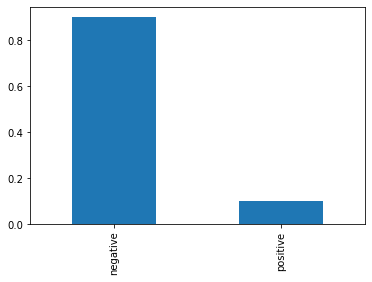

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("C:\\Users\\dell\\Machine Learning Assignment\\26-Apr\\dataset.xlsx")
data

data['SARS-Cov-2 exam result'].value_counts()

data['SARS-Cov-2 exam result'].value_counts(normalize=True).plot.bar()

missing_data = data.isna().sum()/data.shape[0] #sum() to count the number of missing values in each column
#print(data.isnull().mean())                   #mean() to calculate the fraction of missing values in each column

# set the display options to show all columns
pd.set_option('display.max_columns', None) #Displays all columns in a dataframe, without truncation
pd.set_option('display.max_rows', None)    #Displays all rows in a dataframe, without truncation
pd.set_option('display.width', None)       #Displays the dataframe without line wrapping
pd.set_option('display.max_colwidth', -1)  #Displays all the text in each cell, without truncation

print(missing_data)


#Selects the columns with missing data between 86% and 90% and assigns them to a list called "blood"

blood = list(data.columns[(missing_data > 0.86) & (missing_data < 0.9)])
print(blood)

data = data[['SARS-Cov-2 exam result'] + blood]

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=0)

# Encode categorical variables
def encode(data): 
    encoder = {"not_detected": 0, "negative": 0, "detected": 1, "positive": 1}
    for column in data.select_dtypes(include=['object']):
        data.loc[:, column] = data[column].map(encoder)
    return data

# Drop NA
def impute(data):
    data = data.dropna(axis=0)
    return  data

def preprocessing(data):    
    data = encode(data) 
    data = impute(data)
    
    X = data.drop('SARS-Cov-2 exam result', axis=1)
    y = data['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [2]:
X_train, y_train = preprocessing(train)

0    422
1    65 
Name: SARS-Cov-2 exam result, dtype: int64


In [3]:
X_test, y_test = preprocessing(test)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


Logistic Regression
Accuracy: 0.8468
Confusion matrix:
[[93  2]
 [15  1]]
F1 score: 0.7994
Recall score: 0.8468
Precision score: 0.7850
--------------


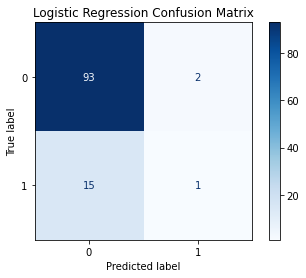

K Nearest Neighbors
Accuracy: 0.8559
Confusion matrix:
[[91  4]
 [12  4]]
F1 score: 0.8347
Recall score: 0.8559
Precision score: 0.8282
--------------


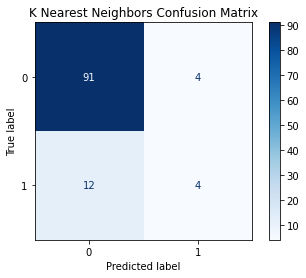

Decision Tree
Accuracy: 0.8559
Confusion matrix:
[[89  6]
 [10  6]]
F1 score: 0.8470
Recall score: 0.8559
Precision score: 0.8415
--------------


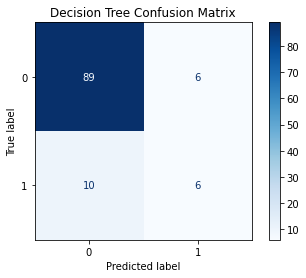

Random Forest
Accuracy: 0.8559
Confusion matrix:
[[94  1]
 [15  1]]
F1 score: 0.8047
Recall score: 0.8559
Precision score: 0.8101
--------------


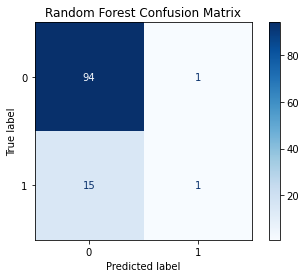

AdaBoost
Accuracy: 0.8468
Confusion matrix:
[[88  7]
 [10  6]]
F1 score: 0.8401
Recall score: 0.8468
Precision score: 0.8351
--------------


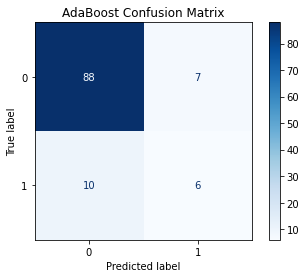

Gradient Boosting
Accuracy: 0.8829
Confusion matrix:
[[92  3]
 [10  6]]
F1 score: 0.8686
Recall score: 0.8829
Precision score: 0.8680
--------------


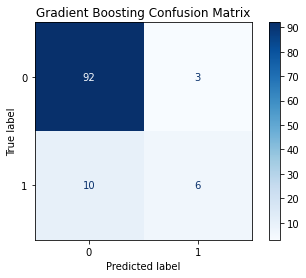

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(DecisionTreeClassifier(random_state=42), random_state=42, learning_rate=0.1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, zero_division=0, average='weighted')
    print(name)
    print(f"Accuracy: {acc:.4f}")
    print(f"Confusion matrix:\n{cm}")
    print(f"F1 score: {f1:.4f}")
    print(f"Recall score: {recall:.4f}")
    print(f"Precision score: {precision:.4f}")
    print("--------------")    
    
    # Plot confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix")
    plt.show() 

In [5]:
import pandas as pd

# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(DecisionTreeClassifier(random_state=42), random_state=42, learning_rate=0.1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

table_data = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, zero_division=0, average='weighted')
    table_data.append([name, acc, f1, recall, precision])

table = pd.DataFrame(table_data, columns=['Model', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])
print(table)


                 Model  Accuracy  F1 Score    Recall  Precision
0  Logistic Regression  0.846847  0.799356  0.846847  0.785035 
1  K Nearest Neighbors  0.855856  0.834744  0.855856  0.828217 
2  Decision Tree        0.855856  0.847046  0.855856  0.841478 
3  Random Forest        0.855856  0.804746  0.855856  0.810150 
4  AdaBoost             0.846847  0.840115  0.846847  0.835052 
5  Gradient Boosting    0.882883  0.868567  0.882883  0.868045 


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Create Gradient Boosting Classifier model
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train,y_train)

# make predictions for test data
y_pred = model.predict(X_test)

# Perform 10-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=10)

# Print the mean and standard deviation of the scores
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(np.mean(scores)))
print("Standard deviation of cross-validation score: {:.2f}".format(np.std(scores)))


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting Classifier model
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train,y_train)

models = []
models.append(('Gradient Boost', model))

# make predictions for test data
y_pred = model.predict(X_test)

# Perform 10-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=10)

# Print the mean and standard deviation of the scores
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Cross-validation scores: [0.81632653 0.85714286 0.91836735 0.89795918 0.91836735 0.79591837
 0.85714286 0.85416667 0.9375     0.875     ]
Average cross-validation score: 0.87
